In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from collections import OrderedDict
from tensorboardX import SummaryWriter
from torchvision import transforms
import torchvision
import torch.optim as optim
import torch.nn.functional as F
import torch.nn as nn
import torch
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from torch.nn import init
from sklearn.metrics import roc_auc_score, accuracy_score
import numpy as np
import pandas as pd
import os
print(os.listdir("../input"))
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
# load data

['train.csv', 'sample_submission.csv', 'test.csv']
['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
print('loading train')
train_df = pd.read_csv('../input/train.csv')
print('loading test')
test_df = pd.read_csv('../input/test.csv')
print(train_df)
print(test_df)

loading train
loading test
             ID_code  target    var_0   ...     var_197  var_198  var_199
0            train_0       0   8.9255   ...      8.5635  12.7803  -1.0914
1            train_1       0  11.5006   ...      8.7889  18.3560   1.9518
2            train_2       0   8.6093   ...      8.2675  14.7222   0.3965
3            train_3       0  11.0604   ...     10.2922  17.9697  -8.9996
4            train_4       0   9.8369   ...      9.5031  17.9974  -8.8104
5            train_5       0  11.4763   ...      9.7670  12.5809  -4.7602
6            train_6       0  11.8091   ...      9.1143  10.8869  -3.2097
7            train_7       0  13.5580   ...      9.4237   8.6624   3.4806
8            train_8       0  16.1071   ...      8.1975  19.5114   4.8453
9            train_9       0  12.5088   ...      7.9133  16.2375  14.2514
10          train_10       0   5.0702   ...      9.2553  14.2914  -7.6652
11          train_11       0  12.7188   ...      9.6745  16.7498  -3.9728
12         

In [3]:
train_drop_label = train_df.drop(['target', 'ID_code'], axis=1) # Features
test_drop_label = test_df.drop(['ID_code'], axis=1)
all_df = pd.concat([train_drop_label, test_drop_label], axis=0)
train_len = train_df.count()[0]
test_len= test_df.count()[0]
print(train_len, test_len)
scaler = preprocessing.StandardScaler()
all_scaled = pd.DataFrame(scaler.fit_transform(all_df), columns=all_df.columns)

train_x,valid_x,train_y,valid_y= train_test_split(all_scaled[:train_len], train_df.target, test_size=.01, shuffle=True)

test_x = all_scaled[train_len:].values

200000 200000


In [4]:
logist_reg = LogisticRegression(solver="sag", max_iter=200)
logist_reg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

Accuracy: 0.9115
Precision: 0.7209302325581395
Recall: 0.28837209302325584


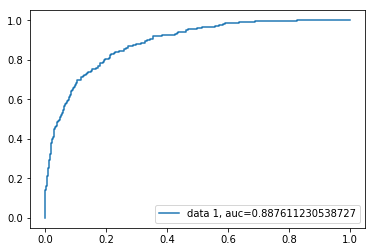

In [5]:
y_pred = logist_reg.predict(valid_x)
# y_pred = [1 - y_pred[:, 0]]
cnf_matrix = metrics.confusion_matrix(valid_y, y_pred)
print("Accuracy:",metrics.accuracy_score(valid_y, y_pred))
print("Precision:",metrics.precision_score(valid_y, y_pred))
print("Recall:",metrics.recall_score(valid_y, y_pred))
y_pred_proba = logist_reg.predict_proba(valid_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(valid_y,  y_pred_proba)
auc = metrics.roc_auc_score(valid_y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Accuracy: 0.9145808080808081
Precision: 0.690677966101695
Recall: 0.2705326158024443


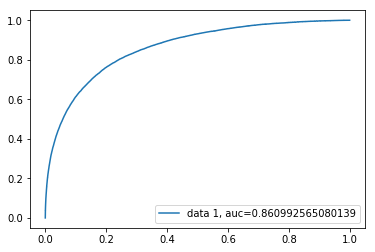

In [6]:
y_pred = logist_reg.predict(train_x)
cnf_matrix = metrics.confusion_matrix(train_y, y_pred)
print("Accuracy:",metrics.accuracy_score(train_y, y_pred))
print("Precision:",metrics.precision_score(train_y, y_pred))
print("Recall:",metrics.recall_score(train_y, y_pred))
y_pred_proba = logist_reg.predict_proba(train_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(train_y,  y_pred_proba)
auc = metrics.roc_auc_score(train_y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [7]:
y_pred_test = logist_reg.predict_proba(test_x)
y_pred_test = 1 - y_pred_test[:, 0]
print(y_pred_test)
dataframe = pd.DataFrame({'ID_code': test_df.ID_code, 'target': y_pred_test})
dataframe.to_csv("result.csv", index=False, sep=',')
print(dataframe.count())
print(dataframe)

[0.19212979 0.24777036 0.04656834 ... 0.00189686 0.05002885 0.1402533 ]
ID_code    200000
target     200000
dtype: int64
            ID_code    target
0            test_0  0.192130
1            test_1  0.247770
2            test_2  0.046568
3            test_3  0.205289
4            test_4  0.063219
5            test_5  0.002694
6            test_6  0.007691
7            test_7  0.156114
8            test_8  0.002160
9            test_9  0.007612
10          test_10  0.141000
11          test_11  0.095266
12          test_12  0.168131
13          test_13  0.011099
14          test_14  0.004900
15          test_15  0.029851
16          test_16  0.183614
17          test_17  0.027600
18          test_18  0.123830
19          test_19  0.026050
20          test_20  0.206794
21          test_21  0.050376
22          test_22  0.020065
23          test_23  0.063367
24          test_24  0.135817
25          test_25  0.054621
26          test_26  0.046989
27          test_27  0.001805
28       